In [1]:
%pylab inline
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#   ================================================

In [3]:
# =============Hao Zhaozhe integrated the data....=========

In [4]:
#  ===============================================

### create figures...

In [5]:
ad_merged_mk_hu_integrated = sc.read('./temData/admk_adhu_scvimerge_Exc_2.h5')

In [6]:
ad_merged_mk_hu_integrated

AnnData object with n_obs × n_vars = 42323 × 4000
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster_labels', 'sampleLayers', 'projectionCellType', 'org', 'batch1', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', 'louvain', 'species'
    var: 'gene_ids-0', 'feature_type

In [7]:
%pylab inline
import sys
sys.path.append('../tools')
from two_species_heatmap import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


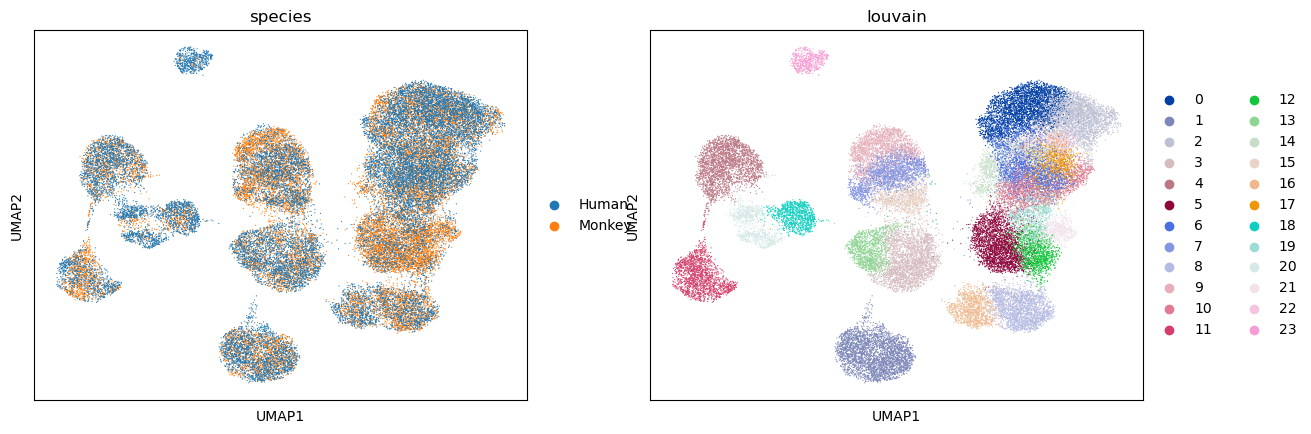

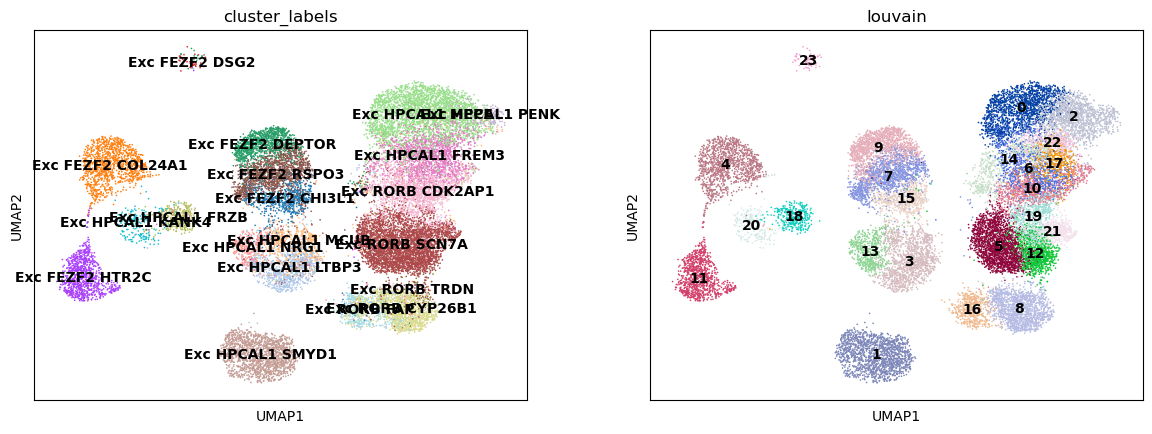

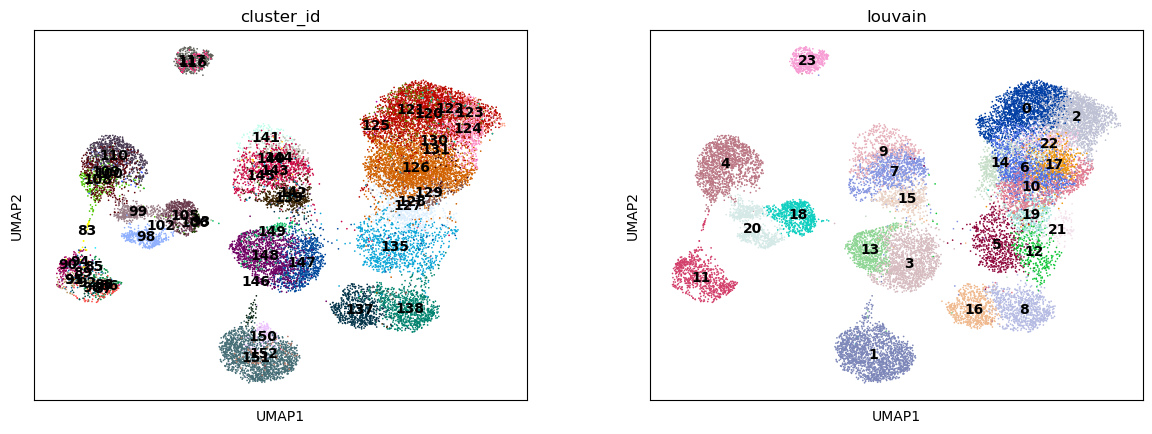

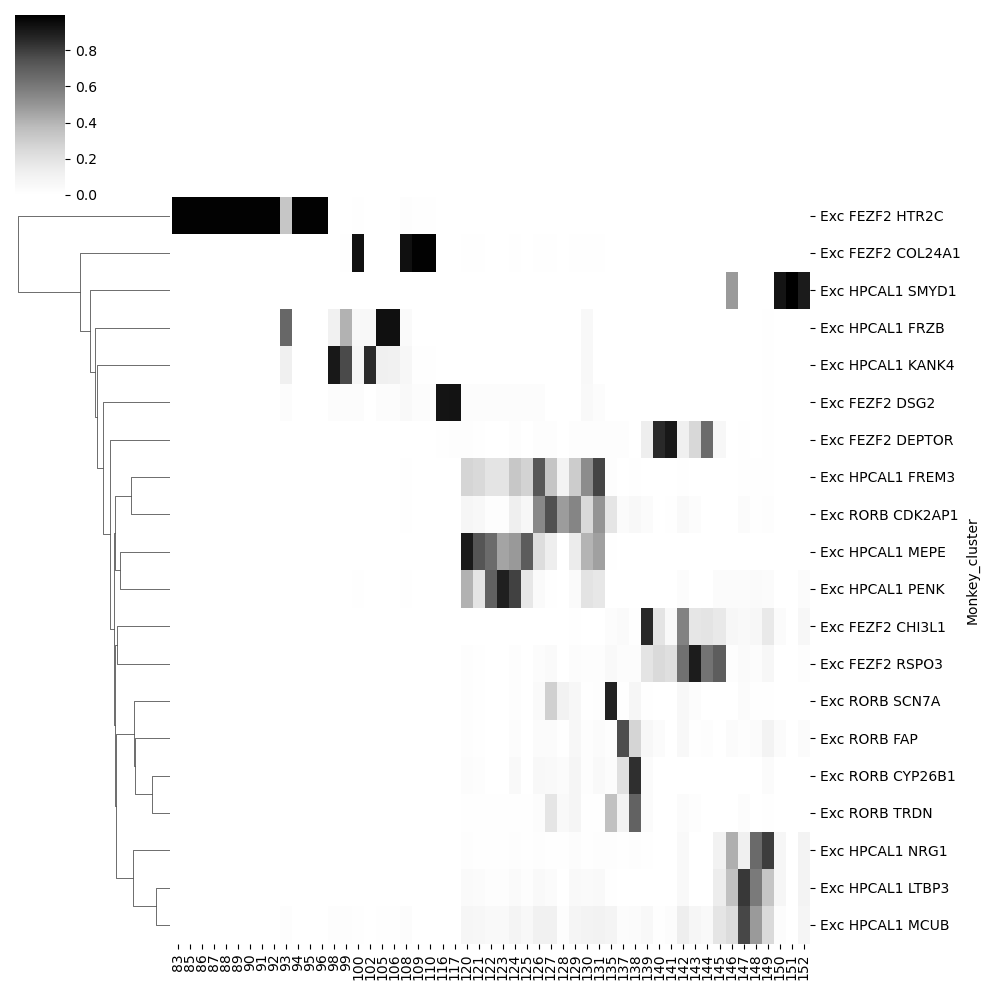

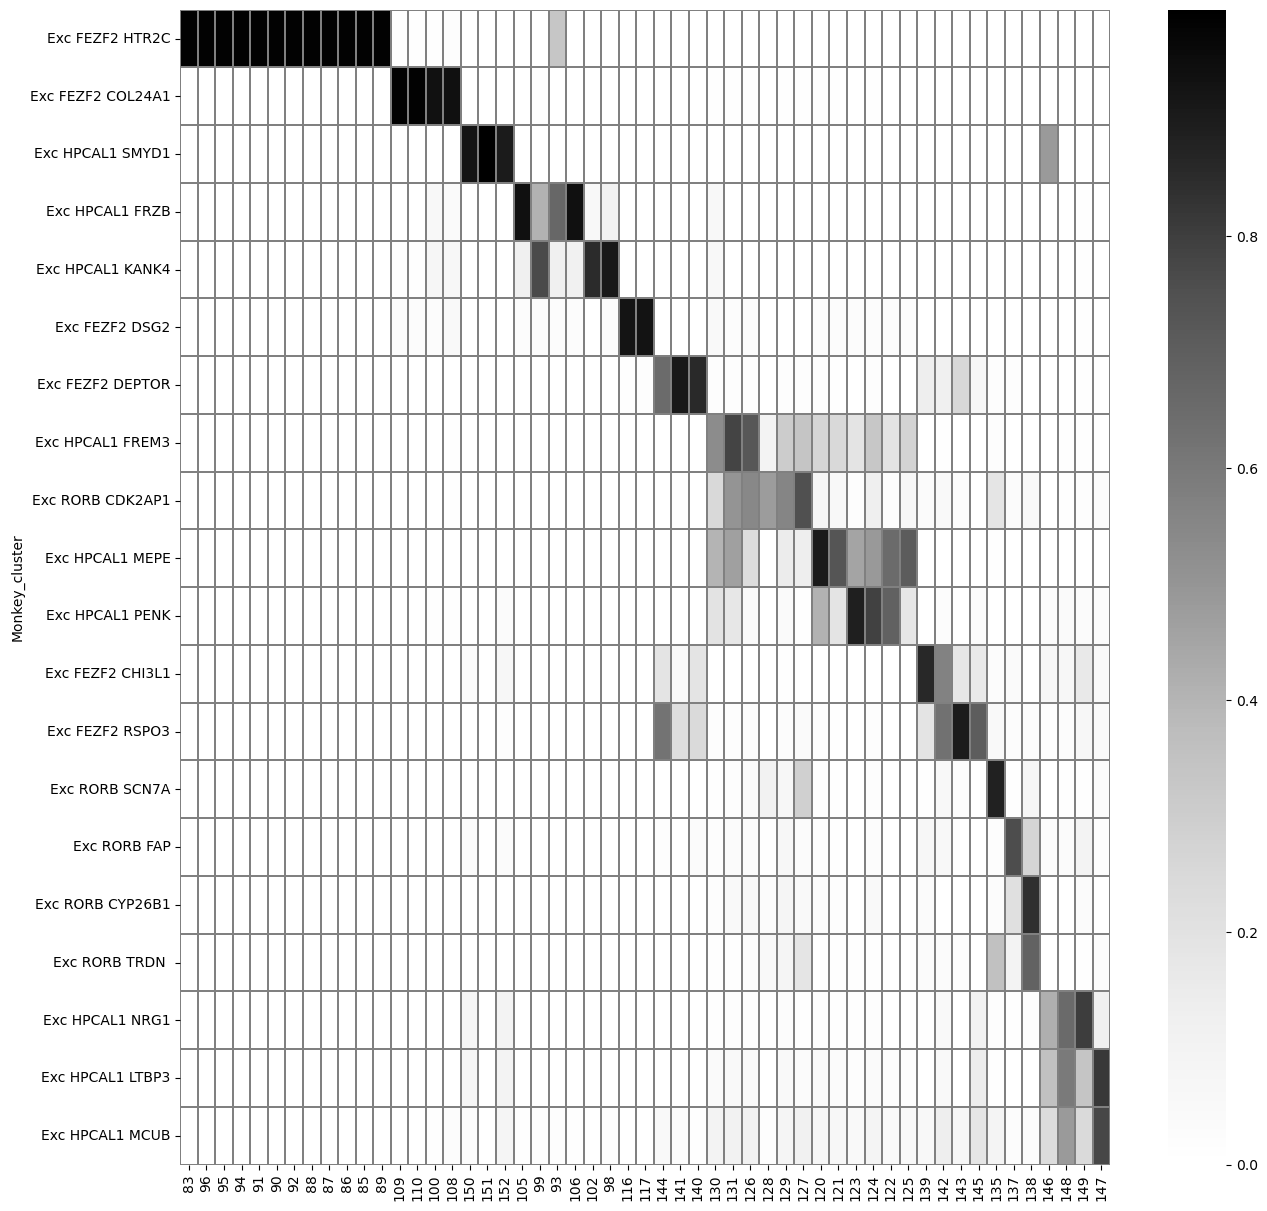

In [8]:
plot_cmpMatrix_mk_vs_hu_lovain_1_8 = two_species_heatmap(ad_merged_mk_hu_integrated, species_1 = 'Monkey', species_2 = 'Human',\
                species_1_key = 'cluster_labels', species_2_key = 'cluster_id',\
                louvain = 1.8)#,figure_path = 'neurons_heatmap_cmp.png')

In [9]:
ad_merged_mk_hu_integrated.write('./temData/ad_merged_mk_hu_integrated_ext_final.h5ad')

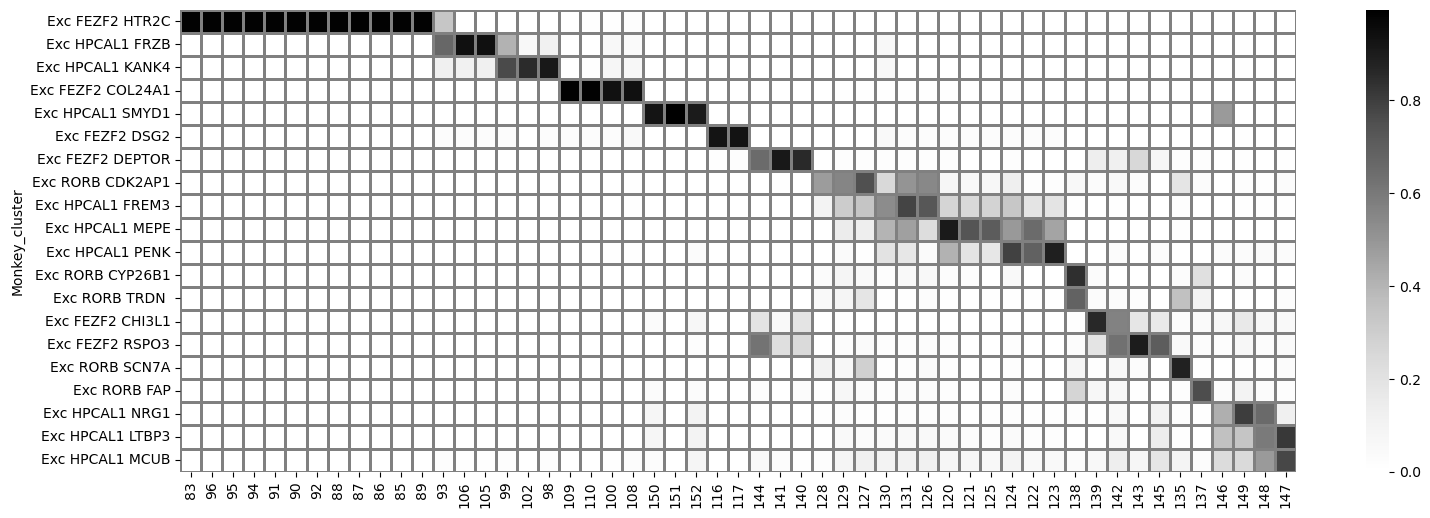

In [10]:
index_order = ['Exc FEZF2 HTR2C', 'Exc HPCAL1 FRZB', 'Exc HPCAL1 KANK4',
               'Exc FEZF2 COL24A1', 'Exc HPCAL1 SMYD1', 'Exc FEZF2 DSG2',
               'Exc FEZF2 DEPTOR', 'Exc RORB CDK2AP1', 'Exc HPCAL1 FREM3', 
               'Exc HPCAL1 MEPE', 'Exc HPCAL1 PENK', 'Exc RORB CYP26B1',
               'Exc RORB TRDN ', 'Exc FEZF2 CHI3L1',
               'Exc FEZF2 RSPO3', 'Exc RORB SCN7A', 'Exc RORB FAP', 
               'Exc HPCAL1 NRG1', 'Exc HPCAL1 LTBP3',
               'Exc HPCAL1 MCUB']                                     
column_order = ['83', '96', '95', '94', '91', '90', '92', '88', '87', '86', '85', '89',
                '93', '106', '105', '99', '102', '98','109', '110', '100', '108', '150', 
                '151', '152', '116', '117', '144', '141', '140', '128', '129', '127', '130', '131',
               '126', '120', '121', '125', '124', '122', '123','138', 
               '139', '142', '143', '145', '135', '137', '146', '149', '148',
               '147']
plot_cmpMatrix_mk_vs_hu_lovain_1_8 = plot_cmpMatrix_mk_vs_hu_lovain_1_8.reindex(index=index_order, columns=column_order)

plt.figure(figsize = (18,6))
sns_plot = sns.heatmap(plot_cmpMatrix_mk_vs_hu_lovain_1_8, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 1, linecolor = 'gray')


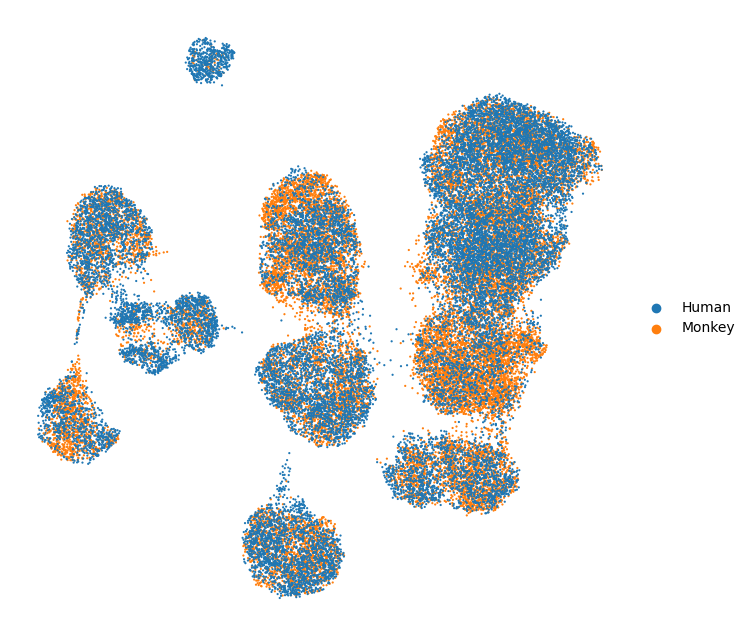

In [11]:
# plot the umaps
figsize(8,8)
sc.pl.umap(ad_merged_mk_hu_integrated,color=['species'],legend_loc='right margin',size=10,frameon='',title='',save='umapSpecieCmp_Exc_mk_vs_hu.pdf')

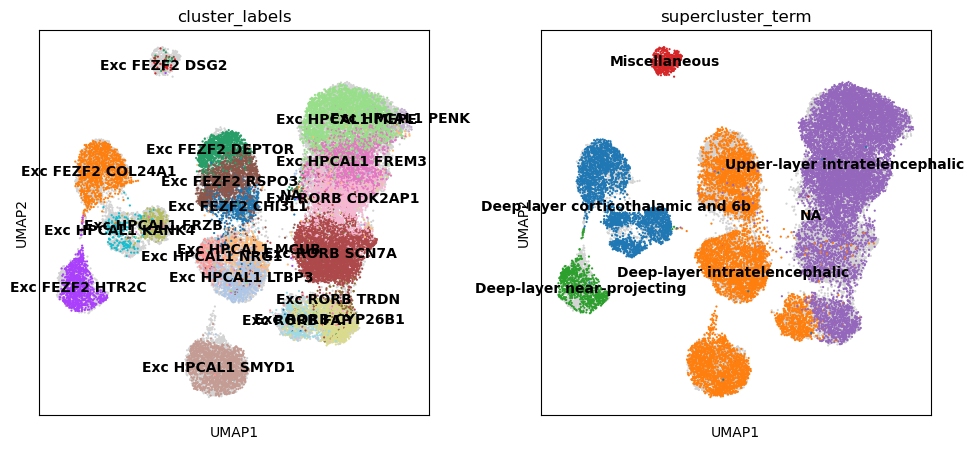

In [12]:
figsize(5,5)
sc.pl.umap(ad_merged_mk_hu_integrated,color=['cluster_labels','supercluster_term'],legend_loc='on data',size=10)

In [13]:
cellDepth_term = ad_merged_mk_hu_integrated.obs['leiden'].astype(str)

cellDepth_term[ cellDepth_term.isin(['0','1','2','5','15','19','7']) ] = 'Layer 2/3 ITs'
cellDepth_term[ cellDepth_term.isin(['13','6','14','18','11','3','9','4']) ] = 'Layer 5/6 ITs'
cellDepth_term[ cellDepth_term.isin(['8']) ] = 'L5/6 CT + VEN-S'
cellDepth_term[ cellDepth_term.isin(['16']) ] = 'L5 ET + VEN-L'
cellDepth_term[ cellDepth_term.isin(['12','17']) ] = 'Layer 6b'
cellDepth_term[ cellDepth_term.isin(['10']) ] = 'NP'

ad_merged_mk_hu_integrated.obs['cellDepth_term'] = cellDepth_term.astype('category')

In [14]:
ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['Layer 2/3 ITs'])

AAACCTGGTAGCTGCC-1-batch-1    False
AAACCTGGTCAGAGGT-1-batch-1     True
AAACGGGTCTGCCCTA-1-batch-1     True
AAAGATGGTGTATGGG-1-batch-1    False
AAAGCAACACTTACGA-1-batch-1     True
                              ...  
10X249_7:CGGGCATAGGAAGTCC     False
10X249_5:CGTCAAATCACTTCTA     False
10X146_7:ACCTGTCAGAAGCGGG     False
10X146_6:AGGATCTGTGATAGAT     False
10X249_6:TCGAAGTAGAAGGTAG     False
Name: cellDepth_term, Length: 42323, dtype: bool

In [15]:
colorIdx = ad_merged_mk_hu_integrated.obs['leiden'].astype(str)
colorIdx[colorIdx==nan] = 100

In [16]:
ad_merged_mk_hu_integrated.obsm['X_umap']

array([[ 5.3735714 , -1.2139591 ],
       [17.689272  ,  8.504537  ],
       [11.7468815 ,  7.78199   ],
       ...,
       [-3.6879983 ,  0.61997026],
       [-3.3315728 , -1.0668392 ],
       [-3.5571945 , -3.688932  ]], dtype=float32)

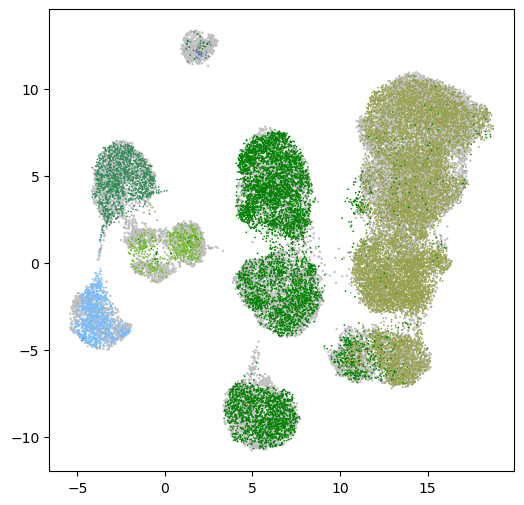

In [17]:
# plot the figures ...

#set colors for cell dots.
clusterColors_table = np.array(['#98A14E', '#008000', '#2E8B57', '#49759c', '#6FBC1E', '#75bbfd','#C0C0C0'])
                                                  # '#90EE90', '#224700', '#228B22', '#00FF7F', '#ADD8E6', '#4666A6',
                                                  # '#1E90FF', '#B4BA77', '#1B655D', '#008B8B', '#00CED1', '#20B2AA',
                                                  # '#66CDAA', '#00FF00'])
colorIdx = ad_merged_mk_hu_integrated.obs['leiden'].astype(str)
Z0_umap = ad_merged_mk_hu_integrated.obsm['X_umap']

colorIdx[:]=6
colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['Layer 2/3 ITs'])] = 0
colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['Layer 5/6 ITs'])] = 1
colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['L5/6 CT + VEN-S'])] = 2
colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['L5 ET + VEN-L'])] = 3
colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['Layer 6b'])] = 4
colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['NP'])] = 5
# colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['nan'])] = 6

cellGroupColors = clusterColors_table[np.array(colorIdx).astype(int)]

figsize(6,6)
plt.scatter(Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Human',0], Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Human',1], s=3, alpha=1,
            c = cellGroupColors[ad_merged_mk_hu_integrated.obs['species']=='Human'], edgecolor='none',
            rasterized=True)
plt.scatter(Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Monkey',0], Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Monkey',1], s=1.5, alpha=1,
            c = cellGroupColors[ad_merged_mk_hu_integrated.obs['species']=='Monkey'], edgecolor='none',
            rasterized=True)

plt.savefig('./figures/merged_monkeyExtGroup_mk_vs_hu.pdf',dpi=600)

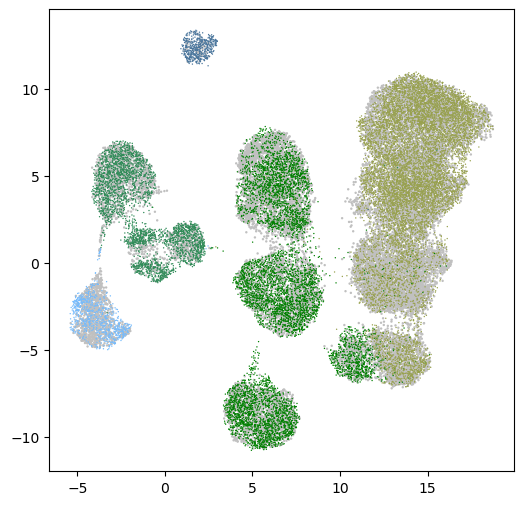

In [18]:

colorIdx[:]=6
colorIdx[ad_merged_mk_hu_integrated.obs['supercluster_term'].isin(['Upper-layer intratelencephalic'])] = 0
colorIdx[ad_merged_mk_hu_integrated.obs['supercluster_term'].isin(['Deep-layer intratelencephalic'])] = 1
colorIdx[ad_merged_mk_hu_integrated.obs['supercluster_term'].isin(['Deep-layer corticothalamic and 6b'])] = 2
colorIdx[ad_merged_mk_hu_integrated.obs['supercluster_term'].isin(['Miscellaneous'])] = 3
colorIdx[ad_merged_mk_hu_integrated.obs['supercluster_term'].isin(['Deep-layer near-projecting'])] = 5
# colorIdx[ad_merged_mk_hu_integrated.obs['cellDepth_term'].isin(['nan'])] = 6

cellGroupColors = clusterColors_table[np.array(colorIdx).astype(int)]

figsize(6,6)
plt.scatter(Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Monkey',0], Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Monkey',1], s=3, alpha=1,
            c = cellGroupColors[ad_merged_mk_hu_integrated.obs['species']=='Monkey'], edgecolor='none',
            rasterized=True)
plt.scatter(Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Human',0], Z0_umap[ad_merged_mk_hu_integrated.obs['species']=='Human',1], s=1, alpha=1,
            c = cellGroupColors[ad_merged_mk_hu_integrated.obs['species']=='Human'], edgecolor='none',
            rasterized=True)

plt.savefig('./figures/merged_humanExtGroup_hu_vs_mk.pdf',dpi=600)

#### Plot inhibitory neurons comparasion figures. Monkey insular vs. human insular ...

In [19]:
ad_merged_mk_hu_integrated = sc.read('./temData/admk_adhu_scvimerge_Inh_2.h5')

# cobine the small clusters...
cluster_id = ad_merged_mk_hu_integrated.obs['cluster_id'].astype(str)
cluster_id[cluster_id.isin(['265','266'])] = '264'
cluster_id[cluster_id.isin(['296'])] = '295'  
ad_merged_mk_hu_integrated.obs['cluster_id'] = cluster_id.astype('category')
ad_merged_mk_hu_integrated

AnnData object with n_obs × n_vars = 28015 × 4000
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sampleLayers', 'cluster_labels', 'Sex', 'mainMarker', 'org', 'batch1', 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', 'species', 'louvain'
    var: 'gene_ids-0', 'feature_types

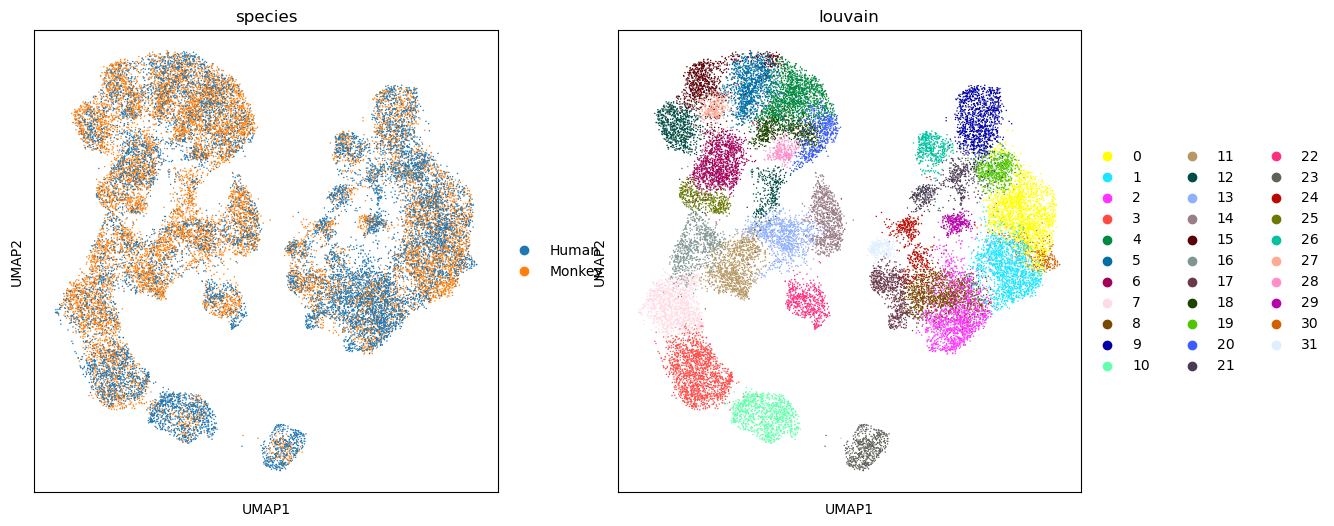

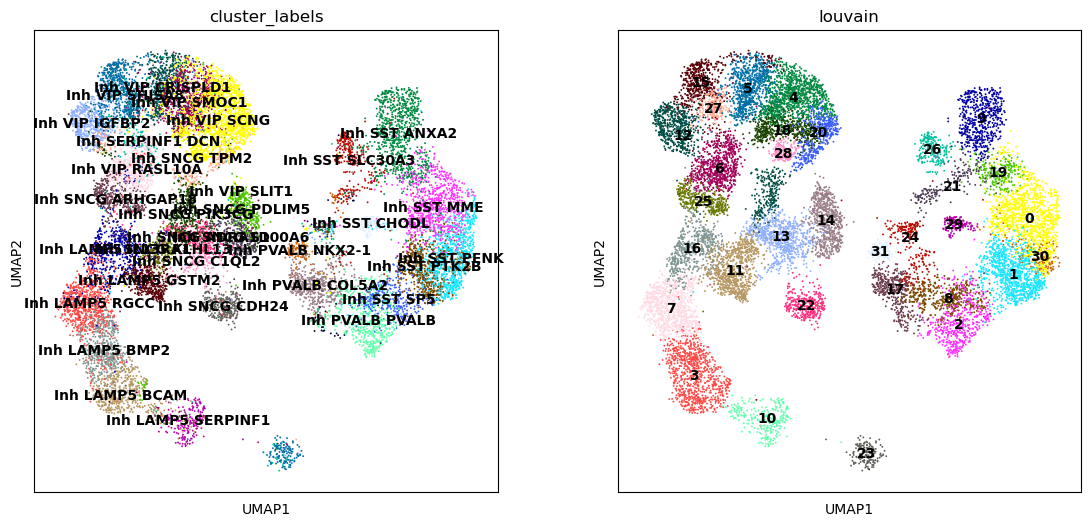

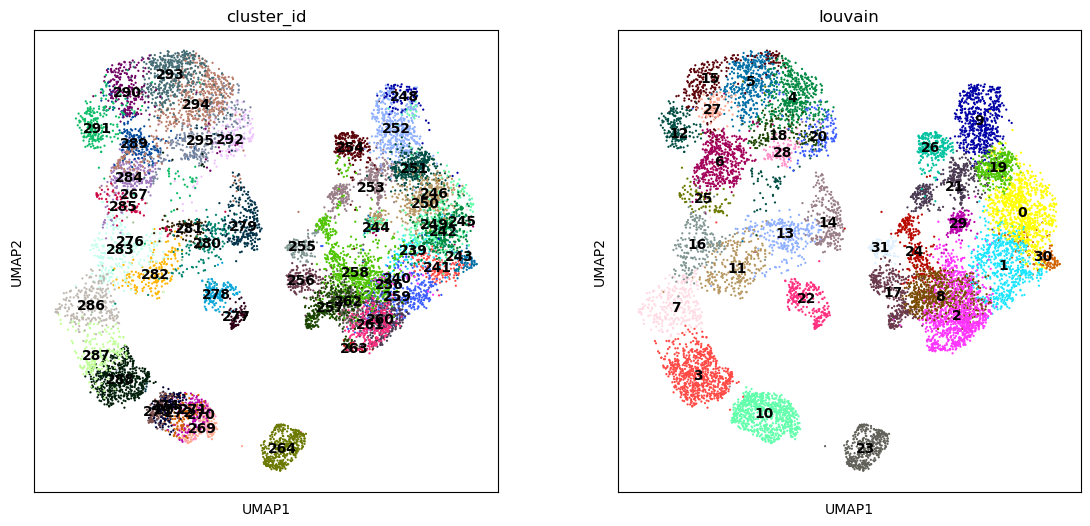

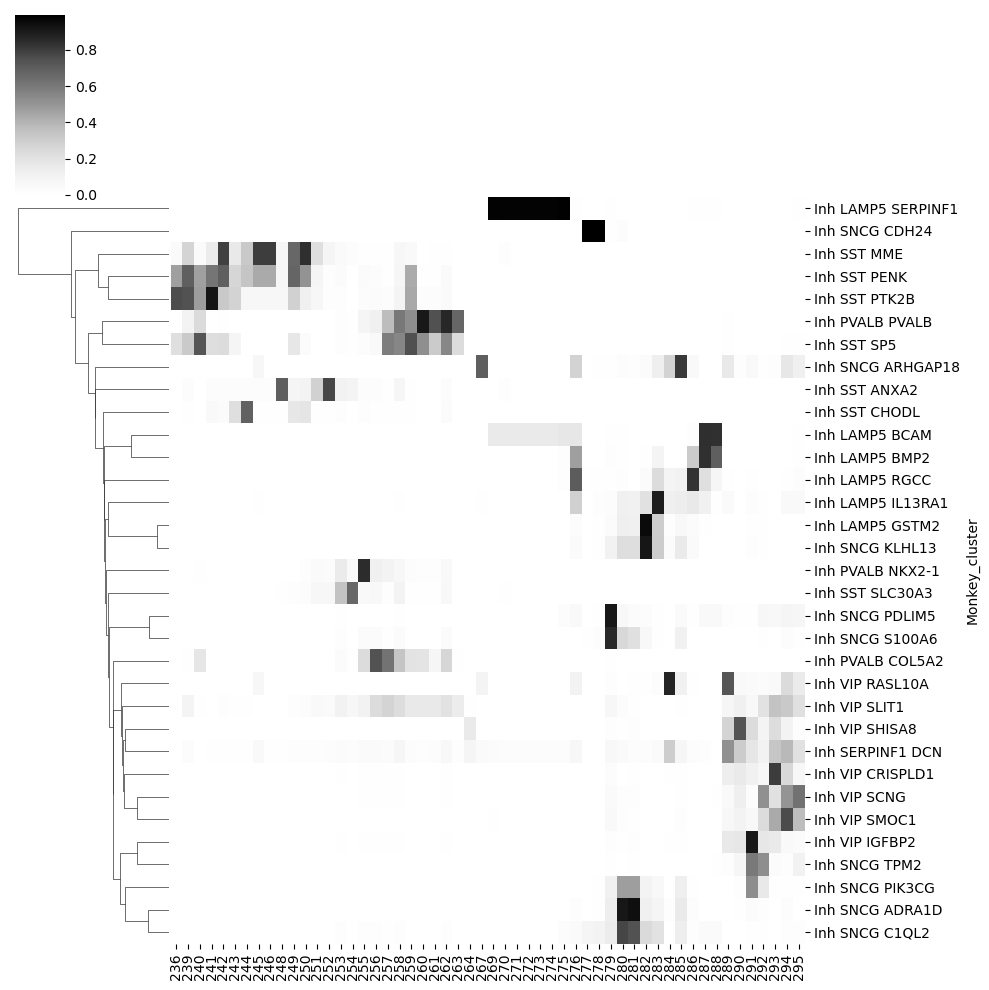

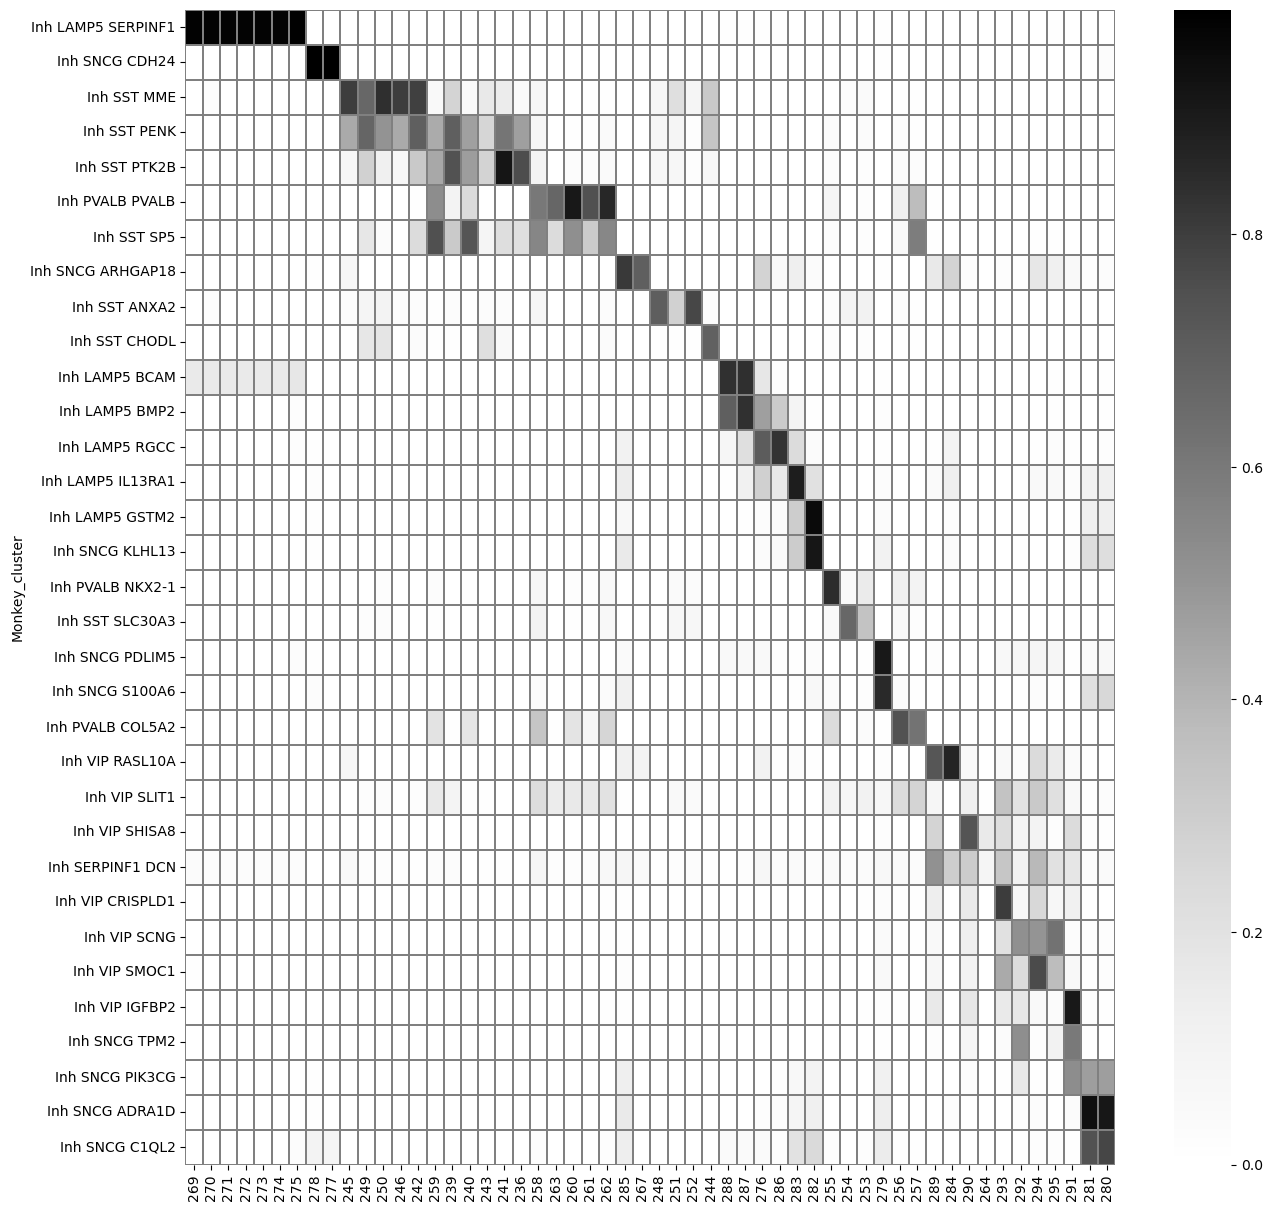

In [20]:
plot_cmpMatrix_mk_vs_hu_lovain_1_8 = two_species_heatmap(ad_merged_mk_hu_integrated, species_1 = 'Monkey', species_2 = 'Human',\
                species_1_key = 'cluster_labels', species_2_key = 'cluster_id',\
                louvain = 2.3)#,figure_path = 'neurons_heatmap_cmp.png')

In [21]:
ad_merged_mk_hu_integrated.write('./temData/ad_merged_mk_hu_integrated_inh_final.h5ad')

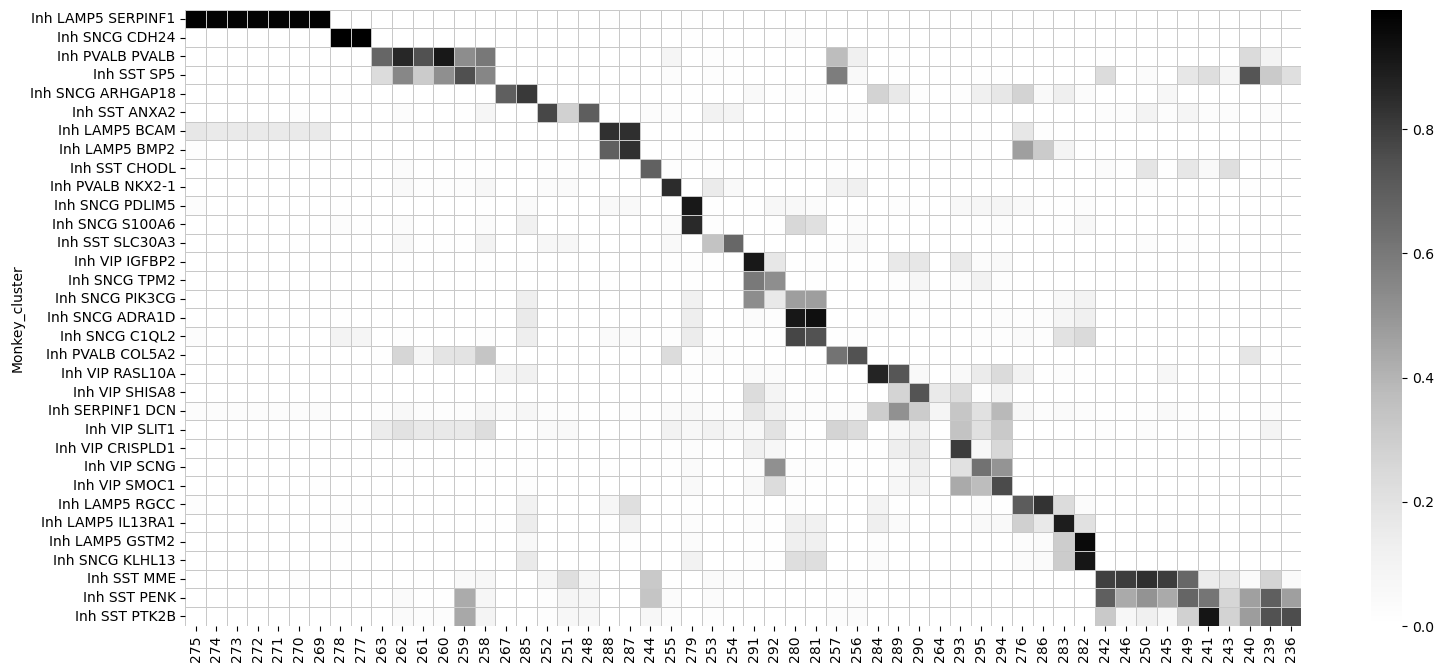

In [22]:
index_order = ['Inh LAMP5 SERPINF1', 'Inh SNCG CDH24', 'Inh PVALB PVALB',
               'Inh SST SP5', 'Inh SNCG ARHGAP18', 'Inh SST ANXA2', 'Inh LAMP5 BCAM',
               'Inh LAMP5 BMP2', 'Inh SST CHODL', 'Inh PVALB NKX2-1',
               'Inh SNCG PDLIM5', 'Inh SNCG S100A6', 'Inh SST SLC30A3',
               'Inh VIP IGFBP2', 'Inh SNCG TPM2', 'Inh SNCG PIK3CG', 'Inh SNCG ADRA1D',
               'Inh SNCG C1QL2', 'Inh PVALB COL5A2', 'Inh VIP RASL10A',
               'Inh VIP SHISA8', 'Inh SERPINF1 DCN', 'Inh VIP SLIT1',
               'Inh VIP CRISPLD1', 'Inh VIP SCNG', 'Inh VIP SMOC1', 'Inh LAMP5 RGCC',
               'Inh LAMP5 IL13RA1', 'Inh LAMP5 GSTM2', 'Inh SNCG KLHL13',
               'Inh SST MME', 'Inh SST PENK', 'Inh SST PTK2B']                  
column_order = ['275', '274', '273', '272', '271', '270', '269', '278', '277', '263',
       '262', '261', '260', '259', '258', '267', '285', '252', '251', '248',
       '288', '287', '244', '255', '279', '253', '254', '291', '292', '280',
       '281', '257', '256', '284', '289', '290',  '264', 
       '293', '295', '294', '276', '286', '283', '282', '242', '246', 
       '250', '245', '249', '241', '243', '240', '239', '236']
plot_cmpMatrix_mk_vs_hu_lovain_1_8 = plot_cmpMatrix_mk_vs_hu_lovain_1_8.reindex(index=index_order, columns=column_order)

plt.figure(figsize = (18,8))
sns_plot = sns.heatmap(plot_cmpMatrix_mk_vs_hu_lovain_1_8, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 0.5, linecolor = '#C8C8C8')
plt.savefig('figures/inhCmpMatrix_mkIns_vs_huIns.pdf',dpi = 600, )

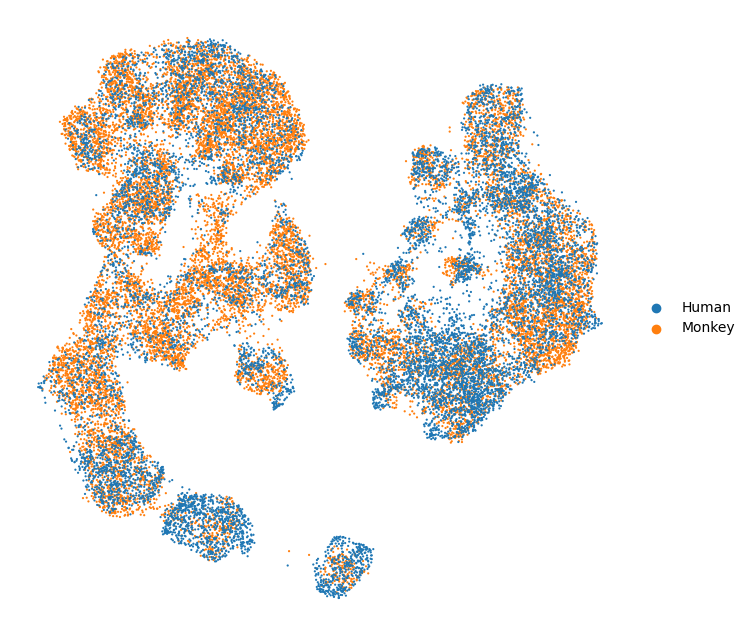

In [23]:
# plot the umaps
figsize(8,8)
sc.pl.umap(ad_merged_mk_hu_integrated,color=['species'],legend_loc='right margin',size=10,frameon='',title='',save='umapSpecieCmp_Inh_mk_vs_hu.pdf')

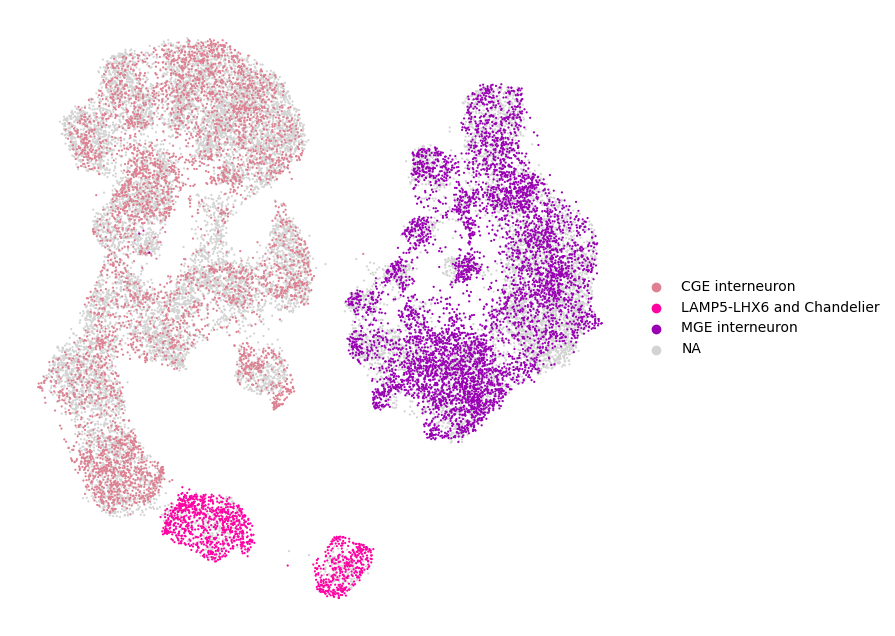

In [24]:
figsize(8,8)
ad_merged_mk_hu_integrated.uns['supercluster_term_colors'] = ['#DD8091', '#fe02a2', '#9900B3']
sc.pl.umap(ad_merged_mk_hu_integrated,color=['supercluster_term'],legend_loc='right margin',size=10,frameon='',title='',save='huNeuronGroupUmapSpecieCmp_Inh_mk_vs_hu.pdf')

In [25]:
cellGroup_term = ad_merged_mk_hu_integrated.obs['leiden'].astype(str)

cellGroup_term[ cellGroup_term.isin(['1','2','4','8','20','31']) ] = 'SST'
cellGroup_term[ cellGroup_term.isin(['10','14','24','30']) ] = 'PVALB'
cellGroup_term[ cellGroup_term.isin(['3','9','11','15','16','29']) ] = 'LAMP5'
cellGroup_term[ cellGroup_term.isin(['17','18','19','21','22','23','25','27','28','']) ] = 'SNCG'
cellGroup_term[ cellGroup_term.isin(['0','5','6','7','12','13','26','32']) ] = 'VIP'


ad_merged_mk_hu_integrated.obs['cellGroup_term'] = cellGroup_term.astype('category')

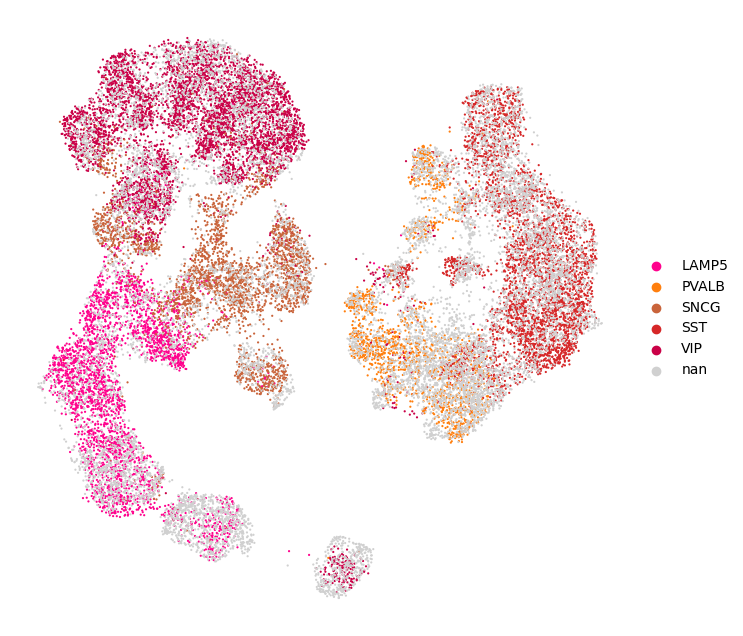

In [26]:
figsize(8,8)
ad_merged_mk_hu_integrated.uns['cellGroup_term_colors'] = ['#ff028d', '#ff7f0e', '#c9643b', '#d62728', '#ca0147','#d0d0d0']
sc.pl.umap(ad_merged_mk_hu_integrated,color=['cellGroup_term'],legend_loc='right margin',size=10,frameon='',title='',save='mkNeuronGroupUmapSpecieCmp_Inh_mk_vs_hu.pdf')

In [27]:
insData_inh = sc.read('../data_h5/Inhib_sorted.h5ad')
insData_inh

AnnData object with n_obs × n_vars = 16364 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sampleLayers', 'cluster_labels', 'Sex', 'mainMarker'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sex_colors', 'batch_colors', 'cluster_labels_colors', 'cluster_names', 'hvg', 'leiden', 'leiden_colors', 'mainMarker_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', 'X_umapraw'
    varm: 'PCs'
    layers: 'RawCounts'
    obsp: 'connectivities', 'distances'

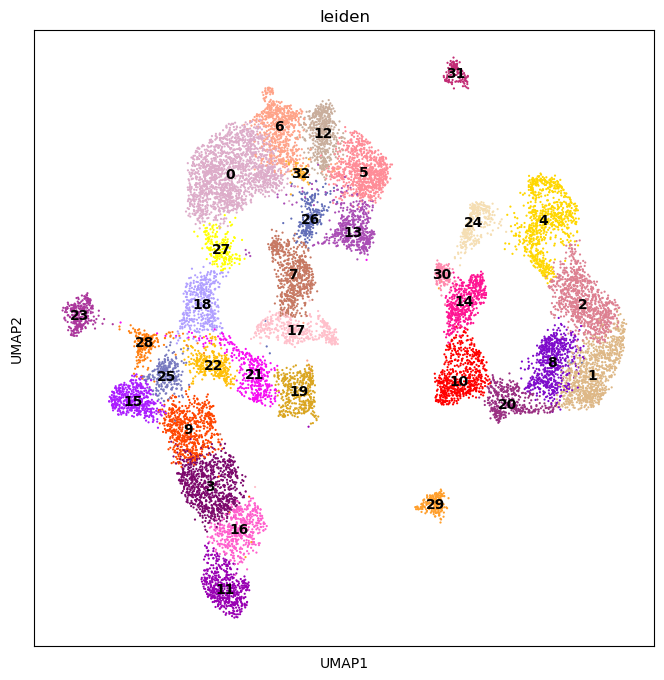

In [28]:
sc.pl.umap(insData_inh,color=['leiden'], legend_loc='on data', size=10)